# Here we will use ptune learning method as baseline for genre classification


In [1]:
import sys
import os

sys.path.append(os.path.abspath('../'))

In [2]:
import numpy as np

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
import torch
torch.cuda.empty_cache()
device = 'cuda' if torch.cuda.is_available() else 'cpu'

from transformers import AutoModelForCausalLM, AutoTokenizer

from src.utils import logger, DatasetTypes
from src.data import init_data
from src.ptune import prepare_ptune, train, MultiLabelClassifier
from src.model import get_pretrained
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
import json
import re
# supported files in spython
device

/home/super-pc2/miniconda3/envs/genre-lyrics/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'cuda'

In [3]:
model_name = "Qwen/Qwen3-0.6B"
tokenizer, base_model = get_pretrained(model_name, device)

## Get dataset with all genres and 1,294,054 examples

In [4]:
path_to_csv = '../data/top_genres.csv'
train_dataset, val_dataset, test_dataset , idx2genre, genres, train_loader, val_loader, test_loader = init_data(path_to_csv=path_to_csv, batch_size=16, tokenizer=tokenizer)

In [5]:
peft_model = prepare_ptune(model=base_model, model_name=model_name, genres=genres, device=device)
hidden_size = base_model.config.hidden_size
num_labels = len(genres)
model = MultiLabelClassifier(peft_model, hidden_size, num_labels).to("cuda")

trainable params: 30,720 || all params: 596,080,640 || trainable%: 0.0052


In [6]:
num_epochs = 100
warmup_steps = 500
learning_rate = 1e-4
treshold = 0.3

`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.
Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.85it/s]


Epoch 1/100 | Train Loss: 0.0820 | Val F1: 0.2025 | P: 0.1290 | R: 0.7500


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.82it/s]


Epoch 2/100 | Train Loss: 0.0300 | Val F1: 0.2031 | P: 0.1291 | R: 0.7500


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.83it/s]


Epoch 3/100 | Train Loss: 0.0243 | Val F1: 0.2028 | P: 0.1290 | R: 0.7500


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.83it/s]


Epoch 4/100 | Train Loss: 0.0213 | Val F1: 0.2033 | P: 0.1292 | R: 0.7500


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.82it/s]


Epoch 5/100 | Train Loss: 0.0197 | Val F1: 0.2033 | P: 0.1292 | R: 0.7500


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.83it/s]


Epoch 6/100 | Train Loss: 0.0172 | Val F1: 0.2035 | P: 0.1293 | R: 0.7500


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.82it/s]


Epoch 7/100 | Train Loss: 0.0154 | Val F1: 0.2045 | P: 0.1298 | R: 0.7500


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 8/100 | Train Loss: 0.0141 | Val F1: 0.2076 | P: 0.1316 | R: 0.7500


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.78it/s]


Epoch 9/100 | Train Loss: 0.0120 | Val F1: 0.2065 | P: 0.1311 | R: 0.7344


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.79it/s]


Epoch 10/100 | Train Loss: 0.0114 | Val F1: 0.2092 | P: 0.1332 | R: 0.7188


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 11/100 | Train Loss: 0.0099 | Val F1: 0.2073 | P: 0.1322 | R: 0.6749


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


Epoch 12/100 | Train Loss: 0.0093 | Val F1: 0.2117 | P: 0.1351 | R: 0.7031


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.79it/s]


Epoch 13/100 | Train Loss: 0.0081 | Val F1: 0.2130 | P: 0.1358 | R: 0.6749


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 14/100 | Train Loss: 0.0067 | Val F1: 0.2180 | P: 0.1398 | R: 0.6749


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.82it/s]


Epoch 15/100 | Train Loss: 0.0063 | Val F1: 0.2141 | P: 0.1380 | R: 0.6803


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.75it/s]


Epoch 16/100 | Train Loss: 0.0055 | Val F1: 0.2217 | P: 0.1427 | R: 0.6803


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.83it/s]


Epoch 17/100 | Train Loss: 0.0051 | Val F1: 0.2228 | P: 0.1434 | R: 0.6252


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.82it/s]


Epoch 18/100 | Train Loss: 0.0044 | Val F1: 0.2079 | P: 0.1358 | R: 0.5343


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


Epoch 19/100 | Train Loss: 0.0039 | Val F1: 0.2237 | P: 0.1456 | R: 0.6051


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.79it/s]


Epoch 20/100 | Train Loss: 0.0034 | Val F1: 0.2218 | P: 0.1448 | R: 0.5740


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 21/100 | Train Loss: 0.0028 | Val F1: 0.2212 | P: 0.1456 | R: 0.5724


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 22/100 | Train Loss: 0.0025 | Val F1: 0.2198 | P: 0.1447 | R: 0.5612


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


Epoch 23/100 | Train Loss: 0.0029 | Val F1: 0.2288 | P: 0.1502 | R: 0.5745


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


Epoch 24/100 | Train Loss: 0.0027 | Val F1: 0.2347 | P: 0.1549 | R: 0.5769


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.83it/s]


Epoch 25/100 | Train Loss: 0.0019 | Val F1: 0.2318 | P: 0.1536 | R: 0.5503


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


Epoch 26/100 | Train Loss: 0.0021 | Val F1: 0.2336 | P: 0.1551 | R: 0.5686


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 27/100 | Train Loss: 0.0018 | Val F1: 0.2293 | P: 0.1534 | R: 0.5212


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.79it/s]


Epoch 28/100 | Train Loss: 0.0019 | Val F1: 0.2359 | P: 0.1569 | R: 0.5669


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 29/100 | Train Loss: 0.0017 | Val F1: 0.2492 | P: 0.1678 | R: 0.5318


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 30/100 | Train Loss: 0.0016 | Val F1: 0.2484 | P: 0.1680 | R: 0.5772


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


Epoch 31/100 | Train Loss: 0.0015 | Val F1: 0.2410 | P: 0.1624 | R: 0.5318


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.79it/s]


Epoch 32/100 | Train Loss: 0.0014 | Val F1: 0.2365 | P: 0.1600 | R: 0.5313


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


Epoch 33/100 | Train Loss: 0.0010 | Val F1: 0.2453 | P: 0.1660 | R: 0.5297


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.79it/s]


Epoch 34/100 | Train Loss: 0.0009 | Val F1: 0.2429 | P: 0.1667 | R: 0.5029


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.83it/s]


Epoch 35/100 | Train Loss: 0.0008 | Val F1: 0.2429 | P: 0.1659 | R: 0.5043


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.82it/s]


Epoch 36/100 | Train Loss: 0.0006 | Val F1: 0.2488 | P: 0.1710 | R: 0.5119


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 37/100 | Train Loss: 0.0006 | Val F1: 0.2504 | P: 0.1715 | R: 0.5097


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.82it/s]


Epoch 38/100 | Train Loss: 0.0006 | Val F1: 0.2451 | P: 0.1682 | R: 0.4984


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


Epoch 39/100 | Train Loss: 0.0005 | Val F1: 0.2464 | P: 0.1729 | R: 0.4871


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


Epoch 40/100 | Train Loss: 0.0004 | Val F1: 0.2547 | P: 0.1790 | R: 0.4849


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 41/100 | Train Loss: 0.0004 | Val F1: 0.2465 | P: 0.1704 | R: 0.4887


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.79it/s]


Epoch 42/100 | Train Loss: 0.0004 | Val F1: 0.2554 | P: 0.1768 | R: 0.5081


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


Epoch 43/100 | Train Loss: 0.0004 | Val F1: 0.2523 | P: 0.1758 | R: 0.4806


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.74it/s]


Epoch 44/100 | Train Loss: 0.0003 | Val F1: 0.2508 | P: 0.1756 | R: 0.4828


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.79it/s]


Epoch 45/100 | Train Loss: 0.0003 | Val F1: 0.2463 | P: 0.1753 | R: 0.4373


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.82it/s]


Epoch 46/100 | Train Loss: 0.0003 | Val F1: 0.2538 | P: 0.1788 | R: 0.4784


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.79it/s]


Epoch 47/100 | Train Loss: 0.0003 | Val F1: 0.2469 | P: 0.1772 | R: 0.4330


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.82it/s]


Epoch 48/100 | Train Loss: 0.0003 | Val F1: 0.2549 | P: 0.1799 | R: 0.4828


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.78it/s]


Epoch 49/100 | Train Loss: 0.0003 | Val F1: 0.2635 | P: 0.1874 | R: 0.4865


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 50/100 | Train Loss: 0.0002 | Val F1: 0.2512 | P: 0.1767 | R: 0.4709


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.79it/s]


Epoch 51/100 | Train Loss: 0.0002 | Val F1: 0.2592 | P: 0.1844 | R: 0.4806


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


Epoch 52/100 | Train Loss: 0.0002 | Val F1: 0.2528 | P: 0.1791 | R: 0.4730


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.79it/s]


Epoch 53/100 | Train Loss: 0.0002 | Val F1: 0.2597 | P: 0.1848 | R: 0.4822


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 54/100 | Train Loss: 0.0002 | Val F1: 0.2581 | P: 0.1827 | R: 0.4768


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.75it/s]


Epoch 55/100 | Train Loss: 0.0002 | Val F1: 0.2425 | P: 0.1746 | R: 0.4174


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 56/100 | Train Loss: 0.0002 | Val F1: 0.2489 | P: 0.1788 | R: 0.4308


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 57/100 | Train Loss: 0.0002 | Val F1: 0.2537 | P: 0.1834 | R: 0.4346


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 58/100 | Train Loss: 0.0002 | Val F1: 0.2668 | P: 0.1909 | R: 0.4784


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.79it/s]


Epoch 59/100 | Train Loss: 0.0002 | Val F1: 0.2527 | P: 0.1826 | R: 0.4325


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


Epoch 60/100 | Train Loss: 0.0002 | Val F1: 0.2661 | P: 0.1932 | R: 0.4709


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 61/100 | Train Loss: 0.0002 | Val F1: 0.2595 | P: 0.1909 | R: 0.4308


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 62/100 | Train Loss: 0.0002 | Val F1: 0.2488 | P: 0.1854 | R: 0.3913


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 63/100 | Train Loss: 0.0002 | Val F1: 0.2684 | P: 0.1943 | R: 0.4763


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


Epoch 64/100 | Train Loss: 0.0002 | Val F1: 0.2560 | P: 0.1843 | R: 0.4427


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 65/100 | Train Loss: 0.0001 | Val F1: 0.2678 | P: 0.1942 | R: 0.4704


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


Epoch 66/100 | Train Loss: 0.0001 | Val F1: 0.2692 | P: 0.1967 | R: 0.4747


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.82it/s]


Epoch 67/100 | Train Loss: 0.0001 | Val F1: 0.2661 | P: 0.1930 | R: 0.4725


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.82it/s]


Epoch 68/100 | Train Loss: 0.0001 | Val F1: 0.2717 | P: 0.1968 | R: 0.4784


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.78it/s]


Epoch 69/100 | Train Loss: 0.0001 | Val F1: 0.2401 | P: 0.1772 | R: 0.3816


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.75it/s]


Epoch 70/100 | Train Loss: 0.0001 | Val F1: 0.2617 | P: 0.1936 | R: 0.4271


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 71/100 | Train Loss: 0.0001 | Val F1: 0.2622 | P: 0.1928 | R: 0.4308


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 72/100 | Train Loss: 0.0001 | Val F1: 0.2596 | P: 0.1918 | R: 0.4249


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 73/100 | Train Loss: 0.0001 | Val F1: 0.2730 | P: 0.1983 | R: 0.4763


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 74/100 | Train Loss: 0.0001 | Val F1: 0.2606 | P: 0.1922 | R: 0.4249


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 75/100 | Train Loss: 0.0001 | Val F1: 0.2580 | P: 0.1902 | R: 0.4195


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.83it/s]


Epoch 76/100 | Train Loss: 0.0001 | Val F1: 0.2526 | P: 0.1849 | R: 0.4152


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.79it/s]


Epoch 77/100 | Train Loss: 0.0001 | Val F1: 0.2625 | P: 0.1949 | R: 0.4211


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.82it/s]


Epoch 78/100 | Train Loss: 0.0001 | Val F1: 0.2709 | P: 0.1973 | R: 0.4637


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


Epoch 79/100 | Train Loss: 0.0001 | Val F1: 0.2484 | P: 0.1858 | R: 0.3870


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


Epoch 80/100 | Train Loss: 0.0001 | Val F1: 0.2736 | P: 0.2005 | R: 0.4718


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.79it/s]


Epoch 81/100 | Train Loss: 0.0001 | Val F1: 0.2666 | P: 0.2003 | R: 0.4242


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


Epoch 82/100 | Train Loss: 0.0001 | Val F1: 0.2601 | P: 0.1930 | R: 0.4271


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.79it/s]


Epoch 83/100 | Train Loss: 0.0001 | Val F1: 0.2715 | P: 0.1986 | R: 0.4666


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.82it/s]


Epoch 84/100 | Train Loss: 0.0001 | Val F1: 0.2618 | P: 0.1934 | R: 0.4280


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


Epoch 85/100 | Train Loss: 0.0001 | Val F1: 0.2521 | P: 0.1870 | R: 0.4152


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.82it/s]


Epoch 86/100 | Train Loss: 0.0001 | Val F1: 0.2572 | P: 0.1914 | R: 0.4190


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.79it/s]


Epoch 87/100 | Train Loss: 0.0001 | Val F1: 0.2360 | P: 0.1760 | R: 0.3676


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 88/100 | Train Loss: 0.0001 | Val F1: 0.2431 | P: 0.1814 | R: 0.3773


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.79it/s]


Epoch 89/100 | Train Loss: 0.0001 | Val F1: 0.2637 | P: 0.1959 | R: 0.4308


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


Epoch 90/100 | Train Loss: 0.0001 | Val F1: 0.2480 | P: 0.1835 | R: 0.4043


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.82it/s]


Epoch 91/100 | Train Loss: 0.0001 | Val F1: 0.2482 | P: 0.1836 | R: 0.4071


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.82it/s]


Epoch 92/100 | Train Loss: 0.0001 | Val F1: 0.2656 | P: 0.1976 | R: 0.4303


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 93/100 | Train Loss: 0.0001 | Val F1: 0.2647 | P: 0.1969 | R: 0.4287


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 94/100 | Train Loss: 0.0001 | Val F1: 0.2524 | P: 0.1875 | R: 0.4131


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.79it/s]


Epoch 95/100 | Train Loss: 0.0001 | Val F1: 0.2643 | P: 0.1969 | R: 0.4227


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.82it/s]


Epoch 96/100 | Train Loss: 0.0001 | Val F1: 0.2619 | P: 0.1950 | R: 0.4195


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Epoch 97/100 | Train Loss: 0.0001 | Val F1: 0.2601 | P: 0.1934 | R: 0.4221


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


Epoch 98/100 | Train Loss: 0.0001 | Val F1: 0.2637 | P: 0.1973 | R: 0.4183


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.82it/s]


Epoch 99/100 | Train Loss: 0.0001 | Val F1: 0.2507 | P: 0.1859 | R: 0.4064


Evaluating: 100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


Epoch 100/100 | Train Loss: 0.0001 | Val F1: 0.2519 | P: 0.1856 | R: 0.4114


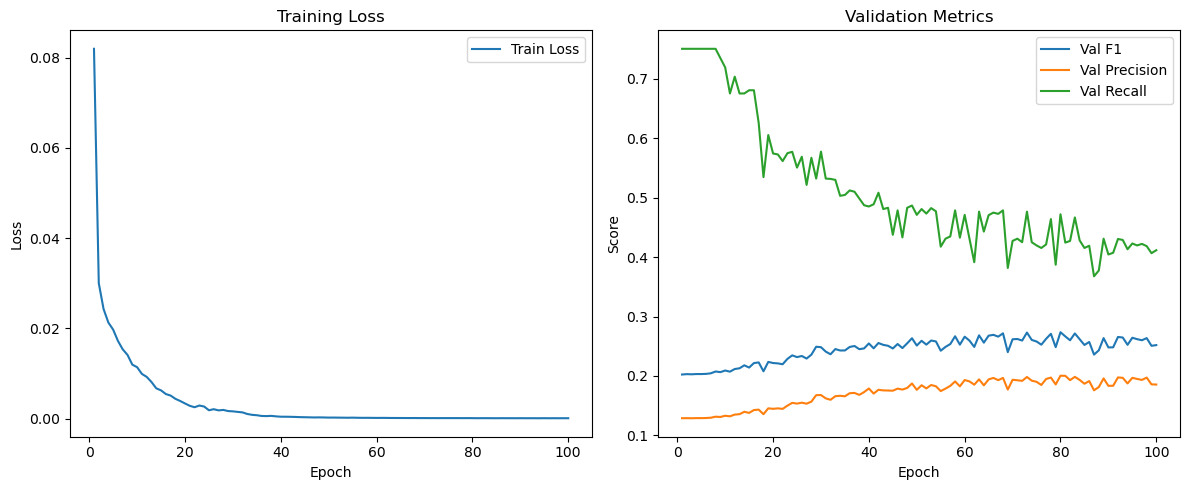

In [7]:
model = train(model=model,
      idx2genre=idx2genre,
      learning_rate=learning_rate,
      num_epochs=num_epochs,
      tokenizer=tokenizer,
      train_loader=train_loader,
      val_loader=val_loader,
      device=device)

In [9]:
model.eval()
threshold = 0.5

print("\nTesting on test set (multi‑label):")
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        true_multilabels = batch['labels']  # [B, num_labels]
        
        # forward через ваш MultiLabelClassifier
        logits = model(input_ids, attention_mask)       # [B, num_labels]
        probs  = torch.sigmoid(logits)                  # [B, num_labels]
        preds  = (probs > threshold).long()             # [B, num_labels]
        
        for i in range(preds.size(0)):
            # собираем списки жанров
            pred_genres = [genres[j] for j, p in enumerate(preds[i]) if p == 1]
            true_genres = [genres[j] for j, t in enumerate(true_multilabels[i]) if t == 1]
            
            pred_str = ", ".join(pred_genres) if pred_genres else "None"
            true_str = ", ".join(true_genres) if true_genres else "None"
            print(f"Predicted genres: {pred_str:<30} | Actual genres: {true_str}")




Testing on test set (multi‑label):
Predicted genres: None                           | Actual genres: r&b
Predicted genres: pop                            | Actual genres: country
Predicted genres: hip-hop                        | Actual genres: hip-hop
Predicted genres: None                           | Actual genres: rock
Predicted genres: pop                            | Actual genres: pop
Predicted genres: pop                            | Actual genres: pop
Predicted genres: None                           | Actual genres: hip-hop
Predicted genres: None                           | Actual genres: hip-hop
Predicted genres: None                           | Actual genres: electronic, pop
Predicted genres: pop                            | Actual genres: pop
Predicted genres: None                           | Actual genres: pop
Predicted genres: hip-hop                        | Actual genres: hip-hop
Predicted genres: hip-hop                        | Actual genres: hip-hop
Predicted genres: